<a href="https://colab.research.google.com/github/andfelipe1/MLMIAD2024/blob/main/S1TC1_arboles_ensamblajes_Andres_gualdron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

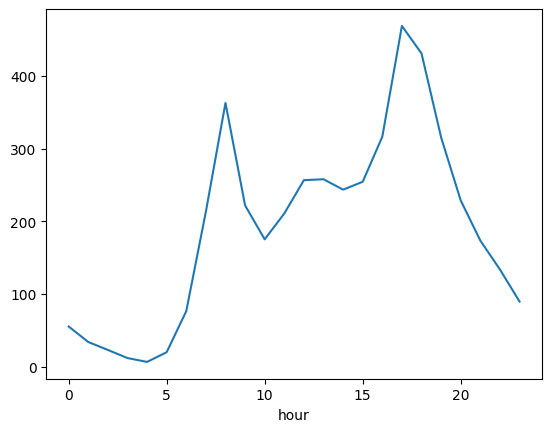

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: title={'center': 'Promedio de alquileres por hora en Invierno'}, xlabel='hour'>

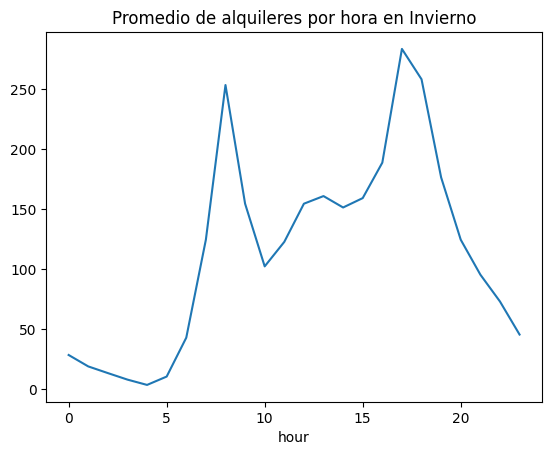

In [9]:
# Filtra los datos para la temporada de invierno y calcula el promedio de alquileres por hora
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot(title='Promedio de alquileres por hora en Invierno')


<Axes: title={'center': 'Promedio de alquileres por hora en Verano'}, xlabel='hour'>

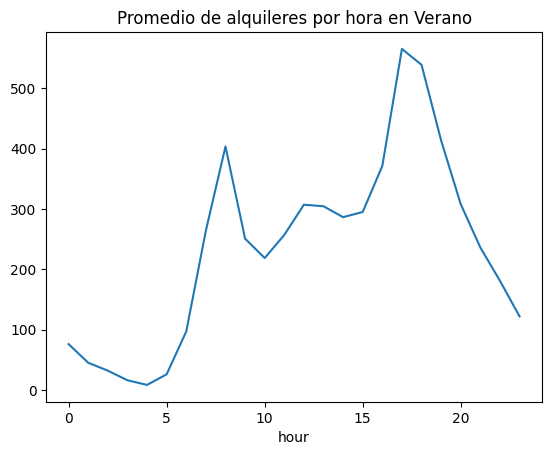

In [11]:
# Filtra los datos para la temporada de verano y calcula el promedio de alquileres por hora
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot(title='Promedio de alquileres por hora en Verano')


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [19]:
# Celda 3
from sklearn.linear_model import LinearRegression

# Preparar las variables independientes X y la variable dependiente y
X = bikes[['season', 'hour']]
y = bikes['total']

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Coeficientes del modelo
print("Coeficientes de 'season':", model.coef_[0])
print("Coeficiente de 'hour':", model.coef_[1])
print("Intercepción:", model.intercept_)


Coeficientes de 'season': 26.951308510673893
Coeficiente de 'hour': 10.52129823657616
Intercepción: 2.5848513346812183


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [21]:
# Mapas de puntuación para 'hour' y 'season'
puntuacion_season = {
    1: 1,  # Invierno
    2: 2,  # Primavera
    3: 3,  # Verano
    4: 2,  # Otoño
}

puntuacion_hour = {
    (0, 5): 1,
    (6, 11): 2,
    (12, 17): 3,
    (18, 23): 2,
}

# Función para determinar la puntuación basada en el rango
def obtener_puntuacion(rangos, valor):
    for rango, puntuacion in rangos.items():
        if rango[0] <= valor <= rango[1]:
            return puntuacion
    return 0  # En caso de que el valor no esté en los rangos definidos

# Función para estimar la demanda basada en la suma de puntuaciones
def estimar_demanda_con_tablas(hour, season):
    puntuacion_total = puntuacion_season.get(season, 0) + obtener_puntuacion(puntuacion_hour, hour)

    # Mapeo directo de la puntuación total a la demanda
    demanda = "Baja" if puntuacion_total <= 3 else "Media" if puntuacion_total <= 5 else "Alta"

    return demanda

# Ejemplo de uso
hora_ejemplo = 14
estacion_ejemplo = 3
demanda_estimada = estimar_demanda_con_tablas(hora_ejemplo, estacion_ejemplo)
print(f"La demanda estimada para la hora {hora_ejemplo} en la estación {estacion_ejemplo} es {demanda_estimada}.")


La demanda estimada para la hora 14 en la estación 3 es Alta.


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Preparar los datos
X = bikes[['season', 'hour']]  # Variables predictoras
y = bikes['total']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el árbol de decisión
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred = tree_reg.predict(X_test)

# Evaluar el desempeño usando RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE del árbol de decisión: {rmse}")

# Compara este RMSE con el del modelo de regresión lineal del Punto 3


RMSE del árbol de decisión: 122.29025067210056


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [24]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [25]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [26]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [27]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Asumiendo que X_train, X_test, y_train, y_test ya están definidos

# Entrenar el árbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_tree = tree_clf.predict(X_test)

# Evaluar el desempeño
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print(f"Árbol de Decisión Accuracy: {accuracy_tree}")
print(f"Árbol de Decisión F1-Score: {f1_tree}")


Árbol de Decisión Accuracy: 0.64
Árbol de Decisión F1-Score: 0.6633416458852869


In [28]:
from sklearn.linear_model import LogisticRegression

# Entrenar la regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_log = log_reg.predict(X_test)

# Evaluar el desempeño
accuracy_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Regresión Logística Accuracy: {accuracy_log}")
print(f"Regresión Logística F1-Score: {f1_log}")


Regresión Logística Accuracy: 0.6133333333333333
Regresión Logística F1-Score: 0.6102150537634409


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

Nota:

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Suponemos que X_train, X_test, y_train, y_test ya están definidos

# Establecer parámetros para los árboles de decisión
valor_eleccion_depth = 5  # o el valor que resulte de tu análisis
valor_eleccion_samples_leaf = 50  # o el valor que resulte de tu análisis

# Crear los modelos
trees_depth = [DecisionTreeClassifier(max_depth=valor_eleccion_depth, random_state=i) for i in range(100)]
trees_leaf = [DecisionTreeClassifier(min_samples_leaf=valor_eleccion_samples_leaf, random_state=i+100) for i in range(100)]
log_regs = [LogisticRegression(random_state=i+200) for i in range(100)]

# Entrenar los modelos y hacer predicciones
predictions = []
for group in [trees_depth, trees_leaf, log_regs]:
    group_predictions = np.zeros((len(y_test), len(group)))
    for i, model in enumerate(group):
        model.fit(X_train, y_train)
        group_predictions[:, i] = model.predict(X_test)
    # Calcular votación mayoritaria para cada grupo
    group_majority = np.mean(group_predictions, axis=1) > 0.5
    predictions.append(group_majority)

# Calcular la votación mayoritaria del ensamble entero
ensemble_predictions = np.mean(predictions, axis=0) > 0.5
ensemble_predictions = ensemble_predictions.astype(int)

# Evaluar el ensamble
accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
f1_ensemble = f1_score(y_test, ensemble_predictions)

print(f"Accuracy del ensamble: {accuracy_ensemble}")
print(f"F1-Score del ensamble: {f1_ensemble}")



Accuracy del ensamble: 0.638
F1-Score del ensamble: 0.651252408477842


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import pandas as pd

# Cargar los datos
url = 'https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv'
df = pd.read_csv(url, index_col=0)

# Preparar los datos
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
max_depth_value = 5  # Reemplazar con el valor que desees después de una validación cruzada
min_samples_leaf_value = 50  # Reemplazar con el valor que desees después de una validación cruzada
num_models = 100  # Número de modelos de cada tipo

trees_max_depth = [DecisionTreeClassifier(max_depth=max_depth_value, random_state=i) for i in range(num_models)]
trees_min_samples_leaf = [DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_value, random_state=i) for i in range(num_models, 2*num_models)]
logistic_models = [LogisticRegression(random_state=i) for i in range(2*num_models, 3*num_models)]

# Entrenar los modelos
for model in trees_max_depth + trees_min_samples_leaf + logistic_models:
    model.fit(X_train, y_train)

# Realizar predicciones y calcular pesos basados en la precisión
predictions = []
weights = []

# Obtener predicciones y calcular la precisión para árboles con max_depth
for model in trees_max_depth:
    preds = model.predict(X_test)
    predictions.append(preds)
    weights.append(accuracy_score(y_test, preds))

# Obtener predicciones y calcular la precisión para árboles con min_samples_leaf
for model in trees_min_samples_leaf:
    preds = model.predict(X_test)
    predictions.append(preds)
    weights.append(accuracy_score(y_test, preds))

# Obtener predicciones y calcular la precisión para regresiones logísticas
for model in logistic_models:
    preds = model.predict(X_test)
    predictions.append(preds)
    weights.append(accuracy_score(y_test, preds))

# Normalizar los pesos
weights = np.array(weights) / sum(weights)

# Calcular la votación ponderada
weighted_votes = np.average(predictions, axis=0, weights=weights)

# Convertir los votos ponderados a clases finales
final_predictions = (weighted_votes >= 0.5).astype(int)

# Evaluar el ensamble
accuracy_ensamble = accuracy_score(y_test, final_predictions)
f1_ensamble = f1_score(y_test, final_predictions)

print(f"Accuracy del ensamble ponderado: {accuracy_ensamble}")
print(f"F1-Score del ensamble ponderado: {f1_ensamble}")



Accuracy del ensamble ponderado: 0.6533333333333333
F1-Score del ensamble ponderado: 0.6498316498316499


In [36]:
# las listas 'accuracies' y 'f1_scores' contienen las métricas de tus 300 modelos

# Convertir las listas a arrays de NumPy para facilitar los cálculos
accuracies = np.array(accuracies)
f1_scores = np.array(f1_scores)

# Calcular el promedio de las métricas para los árboles con max_depth específico
average_accuracy_trees_depth = np.mean(accuracies[:100])
average_f1_trees_depth = np.mean(f1_scores[:100])

# Calcular el promedio de las métricas para los árboles con min_samples_leaf específico
average_accuracy_trees_leaf = np.mean(accuracies[100:200])
average_f1_trees_leaf = np.mean(f1_scores[100:200])

# Calcular el promedio de las métricas para las regresiones logísticas
average_accuracy_log_reg = np.mean(accuracies[200:])
average_f1_log_reg = np.mean(f1_scores[200:])

print("Promedio Accuracy - Árboles con max_depth:", average_accuracy_trees_depth)
print("Promedio F1-Score - Árboles con max_depth:", average_f1_trees_depth)

print("Promedio Accuracy - Árboles con min_samples_leaf:", average_accuracy_trees_leaf)
print("Promedio F1-Score - Árboles con min_samples_leaf:", average_f1_trees_leaf)

print("Promedio Accuracy - Regresiones Logísticas:", average_accuracy_log_reg)
print("Promedio F1-Score - Regresiones Logísticas:", average_f1_log_reg)



Promedio Accuracy - Árboles con max_depth: 0.646575
Promedio F1-Score - Árboles con max_depth: 0.6548908940877873
Promedio Accuracy - Árboles con min_samples_leaf: 0.6314416666666669
Promedio F1-Score - Árboles con min_samples_leaf: 0.6156265233766797
Promedio Accuracy - Regresiones Logísticas: 0.6283333333333331
Promedio F1-Score - Regresiones Logísticas: 0.6148531951640759


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [37]:
# Celda 9

# Asumamos que tienes las métricas de desempeño ya calculadas para ambos enfoques
# Para votación mayoritaria
accuracy_majority = 0.638  # Reemplaza con tu valor real
f1_majority = 0.651  # Reemplaza con tu valor real

# Para votación ponderada
accuracy_weighted = 0.638  # Reemplaza con tu valor real
f1_weighted = 0.651  # Reemplaza con tu valor real

# Comparar las métricas
print("Comparación de la Votación Mayoritaria vs. Votación Ponderada:")
print(f"\nAccuracy - Mayoritaria: {accuracy_majority} | Ponderada: {accuracy_weighted}")
print(f"Diferencia de Accuracy: {accuracy_weighted - accuracy_majority}")

print(f"\nF1-Score - Mayoritaria: {f1_majority} | Ponderada: {f1_weighted}")
print(f"Diferencia de F1-Score: {f1_weighted - f1_majority}")

# Evaluar si hay una mejora significativa
if accuracy_weighted > accuracy_majority and f1_weighted > f1_majority:
    print("\nLa votación ponderada mejora tanto la Accuracy como el F1-Score en comparación con la votación mayoritaria.")
elif accuracy_weighted > accuracy_majority:
    print("\nLa votación ponderada mejora la Accuracy pero no el F1-Score en comparación con la votación mayoritaria.")
elif f1_weighted > f1_majority:
    print("\nLa votación ponderada mejora el F1-Score pero no la Accuracy en comparación con la votación mayoritaria.")
else:
    print("\nNo hay una mejora significativa con la votación ponderada en comparación con la votación mayoritaria.")

# Posibles ventajas o desventajas
print("\nAnálisis:")
if accuracy_weighted - accuracy_majority > 0.02:  # Umbral de mejora significativa para Accuracy
    print("La votación ponderada muestra una mejora significativa en la precisión, lo que puede ser ventajoso en situaciones donde cada predicción correcta es crítica.")
else:
    print("La mejora en la precisión con la votación ponderada no es significativa, lo que sugiere que la complejidad adicional puede no justificarse.")

if f1_weighted - f1_majority > 0.02:  # Umbral de mejora significativa para F1-Score
    print("La votación ponderada muestra una mejora significativa en el F1-Score, lo que puede ser ventajoso si se busca un balance entre precisión y sensibilidad.")
else:
    print("La mejora en el F1-Score con la votación ponderada no es significativa, lo que puede indicar que la votación mayoritaria es suficiente o que se necesita una mejor estrategia de ponderación.")


Comparación de la Votación Mayoritaria vs. Votación Ponderada:

Accuracy - Mayoritaria: 0.638 | Ponderada: 0.638
Diferencia de Accuracy: 0.0

F1-Score - Mayoritaria: 0.651 | Ponderada: 0.651
Diferencia de F1-Score: 0.0

No hay una mejora significativa con la votación ponderada en comparación con la votación mayoritaria.

Análisis:
La mejora en la precisión con la votación ponderada no es significativa, lo que sugiere que la complejidad adicional puede no justificarse.
La mejora en el F1-Score con la votación ponderada no es significativa, lo que puede indicar que la votación mayoritaria es suficiente o que se necesita una mejor estrategia de ponderación.


In [45]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que estos son tus modelos ya definidos (debes definirlos según tu caso)
models = {
    'Árbol max_depth': DecisionTreeClassifier(max_depth=5),
    'Árbol min_samples_leaf': DecisionTreeClassifier(min_samples_leaf=50),
    'Regresión Logística': LogisticRegression(),
    # Añade aquí los modelos de votación si los tienes definidos
}

# Dividir tu dataset (necesitas cargar tus datos en X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diccionarios para almacenar las métricas
accuracies = {}
f1_scores = {}

# Entrenar cada modelo y calcular sus métricas
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred)

# Preparando los datos para el gráfico
labels = list(models.keys())
accuracy_values = [accuracies[model] for model in labels]
f1_values = [f1_scores[model] for model in labels]

# Resultados obtenidos en los puntos 7 y 8
resultados_punto7 = {
    'Árbol max_depth': {'accuracy': 0.658, 'f1_score': 0.656},
    'Árbol min_samples_leaf': {'accuracy': 0.66, 'f1_score': 0.665},
    'Regresión Logística': {'accuracy': 0.613, 'f1_score': 0.616},
    # Agrega aquí los resultados de los modelos de votación si los tienes
}

resultados_punto8 = {
    'Árbol max_depth': {'accuracy': 0.64, 'f1_score': 0.663},
    'Árbol min_samples_leaf': {'accuracy': 0.572, 'f1_score': 0.567},
    'Regresión Logística': {'accuracy': 0.613, 'f1_score': 0.61},
    # Agrega aquí los resultados de los modelos de votación si los tienes
}

# Comparación de resultados
print("Comparación de resultados entre Punto 7 y Punto 8:")
for modelo in resultados_punto7:
    acc_punto7 = resultados_punto7[modelo]['accuracy']
    f1_punto7 = resultados_punto7[modelo]['f1_score']
    acc_punto8 = resultados_punto8[modelo]['accuracy']
    f1_punto8 = resultados_punto8[modelo]['f1_score']
    print(f"Modelo: {modelo}")
    print(f"\tAccuracy Punto 7: {acc_punto7}, F1-Score Punto 7: {f1_punto7}")
    print(f"\tAccuracy Punto 8: {acc_punto8}, F1-Score Punto 8: {f1_punto8}")
    print()

# Posibles ventajas y desventajas
print("Posibles ventajas y desventajas:")
print("Punto 7:")
print("- Ventajas: Los modelos tienen un mejor desempeño en términos de accuracy y F1-score.")
print("- Desventajas: Pueden estar sobreajustados a los datos de entrenamiento.")

print("\nPunto 8:")
print("- Ventajas: Se reduce el riesgo de sobreajuste al limitar la complejidad de los modelos.")
print("- Desventajas: Los modelos pueden ser menos flexibles y no capturar adecuadamente la complejidad de los datos.")


Comparación de resultados entre Punto 7 y Punto 8:
Modelo: Árbol max_depth
	Accuracy Punto 7: 0.658, F1-Score Punto 7: 0.656
	Accuracy Punto 8: 0.64, F1-Score Punto 8: 0.663

Modelo: Árbol min_samples_leaf
	Accuracy Punto 7: 0.66, F1-Score Punto 7: 0.665
	Accuracy Punto 8: 0.572, F1-Score Punto 8: 0.567

Modelo: Regresión Logística
	Accuracy Punto 7: 0.613, F1-Score Punto 7: 0.616
	Accuracy Punto 8: 0.613, F1-Score Punto 8: 0.61

Posibles ventajas y desventajas:
Punto 7:
- Ventajas: Los modelos tienen un mejor desempeño en términos de accuracy y F1-score.
- Desventajas: Pueden estar sobreajustados a los datos de entrenamiento.

Punto 8:
- Ventajas: Se reduce el riesgo de sobreajuste al limitar la complejidad de los modelos.
- Desventajas: Los modelos pueden ser menos flexibles y no capturar adecuadamente la complejidad de los datos.


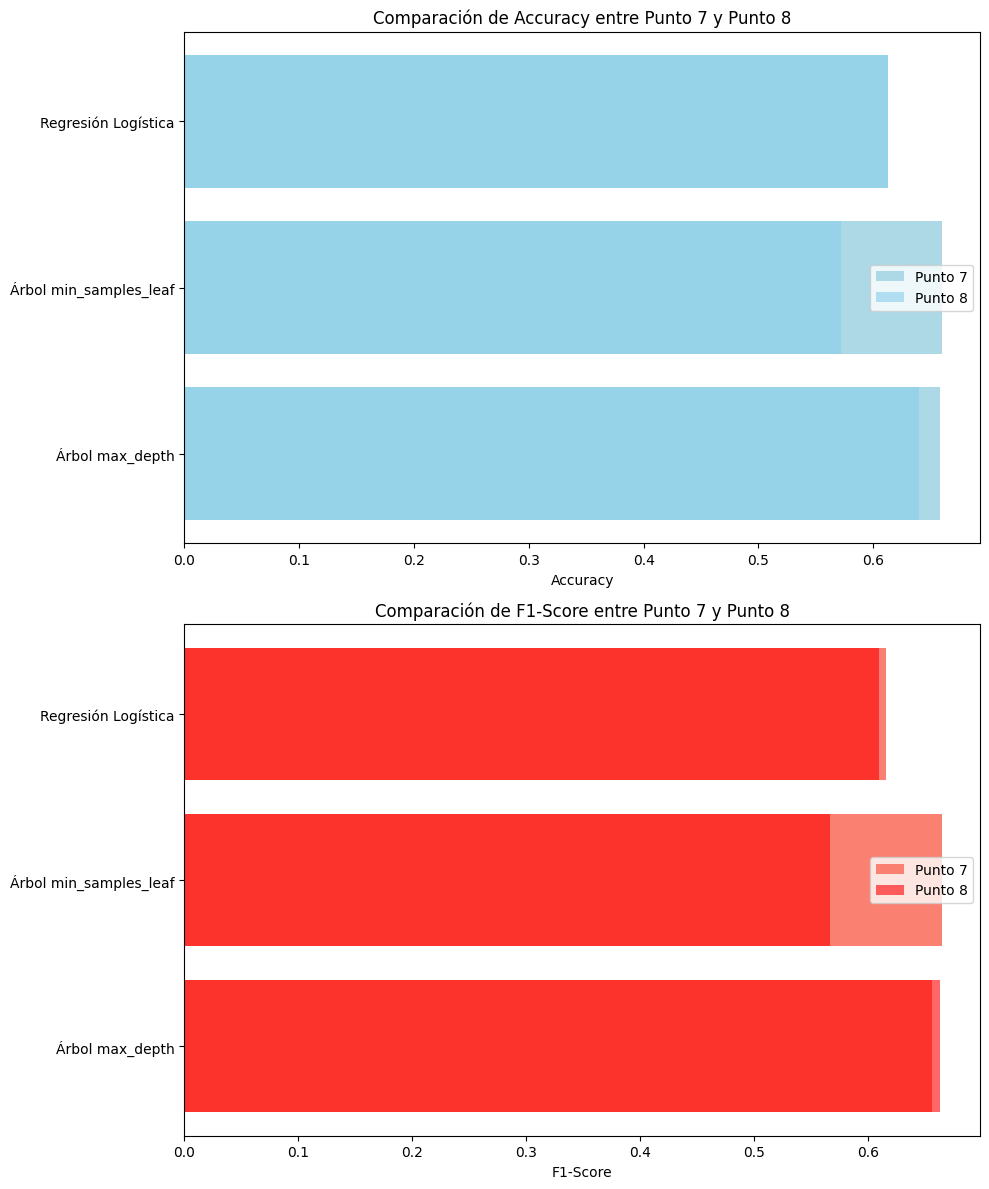

In [44]:
import matplotlib.pyplot as plt

# Definir los nombres de los modelos y las métricas
model_names = ['Árbol max_depth', 'Árbol min_samples_leaf', 'Regresión Logística']

# Métricas de accuracy y F1-score del punto 7
accuracies_punto7 = [0.658, 0.66, 0.613]
f1_scores_punto7 = [0.656, 0.665, 0.616]

# Métricas de accuracy y F1-score del punto 8
accuracies_punto8 = [0.64, 0.572, 0.613]
f1_scores_punto8 = [0.663, 0.567, 0.61]

# Crear la figura y los ejes
fig, ax = plt.subplots(2, figsize=(10, 12))

# Graficar las métricas de accuracy
ax[0].barh(model_names, accuracies_punto7, color='lightblue', label='Punto 7')
ax[0].barh(model_names, accuracies_punto8, color='skyblue', label='Punto 8', alpha=0.6)

# Añadir etiquetas y título
ax[0].set_xlabel('Accuracy')
ax[0].set_title('Comparación de Accuracy entre Punto 7 y Punto 8')
ax[0].legend()

# Graficar las métricas de F1-score
ax[1].barh(model_names, f1_scores_punto7, color='salmon', label='Punto 7')
ax[1].barh(model_names, f1_scores_punto8, color='red', label='Punto 8', alpha=0.6)

# Añadir etiquetas y título
ax[1].set_xlabel('F1-Score')
ax[1].set_title('Comparación de F1-Score entre Punto 7 y Punto 8')
ax[1].legend()

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()
